# Annual Income Prediction ML_Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
## Loading train data into dataframe
## updating '?' in column values to NAN 

columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]
df = pd.read_csv(r"C:\Users\saran\OneDrive\Documents\Radhika\ML\adult\adult.data",header=None,names=columns,
                 sep=",",skipinitialspace=True,na_values="?")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
## Loading Test data
df_test = pd.read_csv(r"C:\Users\saran\OneDrive\Documents\Radhika\ML\adult\adult.test",header=None,names=columns,sep=",",
                      skipinitialspace=True,na_values="?",skiprows=1)
print(df_test)
printmd('replacing ? with nan while reading the data')

## skipinitialspace parameter is used to skip first row with no records

       age     workclass  fnlwgt     education  education_num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
16276   39       Private  215419     Bachelors             13   
16277   64           NaN  321403       HS-grad              9   
16278   38       Private  374983     Bachelors             13   
16279   44       Private   83891     Bachelors             13   
16280   35  Self-emp-inc  182148     Bachelors             13   

           marital_status         occupation    relationship  \
0           Never-married  Machine-op-inspct       Own-child   
1      Married-civ-spouse    Farming-fishing         Husband   
2      Married-civ-spouse  

replacing ? with nan while reading the data

#### Test data has '.' in income column.May have to remove them before using to test

In [8]:
df.info()
# Based on the info, workclass, occupation and native_country columns has NULL/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### workclass = 1836 NULL values
#### Occupation = 1843 NULL values
#### native_country = 583 NULL values

In [7]:
df.isnull().sum()
# workclass = 1836 NULL values
# Occupation = 1843 NULL values
# native_country = 583 NULL values

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [8]:
# Finding the statistical values of train data using describe
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### Understanding missing data

In [9]:
print(df.isnull().mean() * 100)

printmd('workclass and occupation has >5% of values missing. So we cant drop those records')



age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64


workclass and occupation has >5% of values missing. So we cant drop those records

### Imputing missing values with 'un-known'

In [10]:
cat_cols = ['workclass','occupation','native_country']

df[cat_cols] = df[cat_cols].fillna("Unknown")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Removing'.' from the income column in test data

In [12]:
df_test['income'] = (df_test['income'].str.strip().str.replace('.', '', regex=False))
df_test['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: income, Length: 16281, dtype: object

### Dropping columns education_num  and fnlwgt (as we have education column and fnlwgt is just census weight)

In [13]:
df.drop(columns=['fnlwgt', 'education_num'], inplace=True)
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Checking skewness

In [14]:
df.skew(numeric_only=True)


age                0.558743
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

"""

0 :	Perfectly symmetric
Between -0.5 and 0.5 : Approximately symmetric
Between 0.5 and 1 : Moderately skewed
> 1 :	Highly skewed
< -1 :	Highly negatively skewed


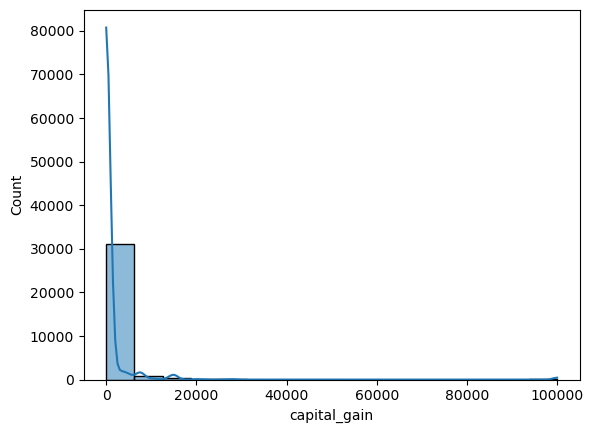

In [15]:
sns.histplot(df['capital_gain'], kde=True)
plt.show()

# Z-Score

Z-scores identify outliers by measuring how many standard deviations a data point is from the mean, typically flagging values with an absolute 
'Z-score >3'
as outliers in normal distributions.

A Z-score of 0 is the mean, while positive/negative values indicate positions above or below the average. 
 
Z-Score: Used when the population standard deviation is known, typically for large samples (n>30).

A Z-score indicates how many standard deviations a raw score is above or below the mean.

The z-score is calculated using the formula:

z = (X-μ)/σ

Where:
σ is the population standard deviation 

μ is the population mean.

The z-score formula doesn’t say anything about sample size; The rule of thumb applies that your sample size should be above 30 to use it.

Reason it doesn't work with Adult dataset:
Z-Score assumes the dataset to be normally distributed.

Adult dataset has columns capital_gain,capital_loss highly skewed and z-score is not ideal to use.


## IQR-Inter Quartile Range to identify Outliers

The IQR describes the middle 50% of values when ordered from lowest to highest. 

To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. 

These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.

Why IQR is better:

Does NOT assume normal distribution

Works well with skewed variables

Preferred for real-world ML

In [16]:
num_cols = ['age','capital_gain','capital_loss','hours_per_week']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} outliers:", outliers.shape[0])


age outliers: 143
capital_gain outliers: 2712
capital_loss outliers: 1519
hours_per_week outliers: 9008


# Box Plot to identify outliers:

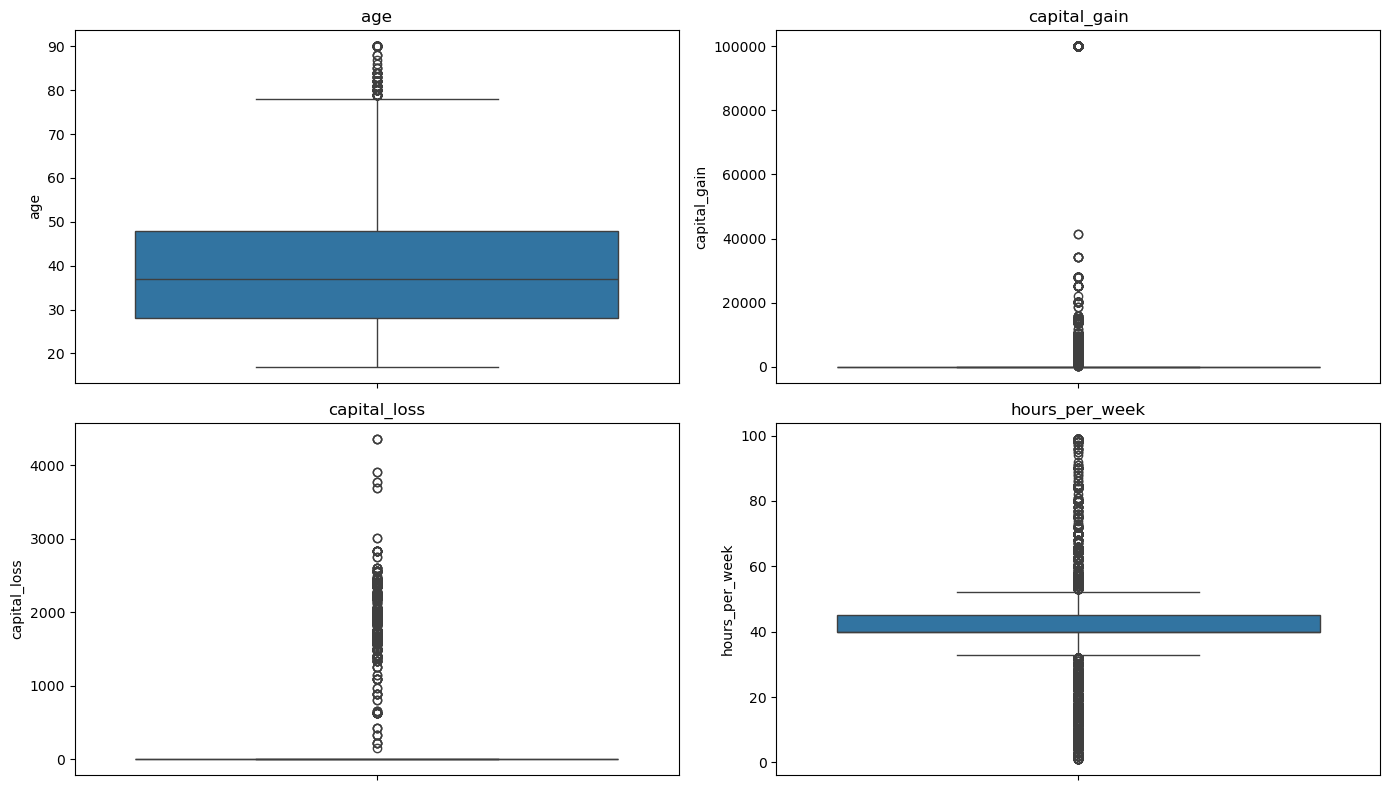

In [21]:
num_cols = df.select_dtypes(include=np.number).columns

cols = 2  
rows = int(np.ceil(len(num_cols) / cols))

plt.figure(figsize=(14, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


## Using log transform to reduce skewness and checking for outliers

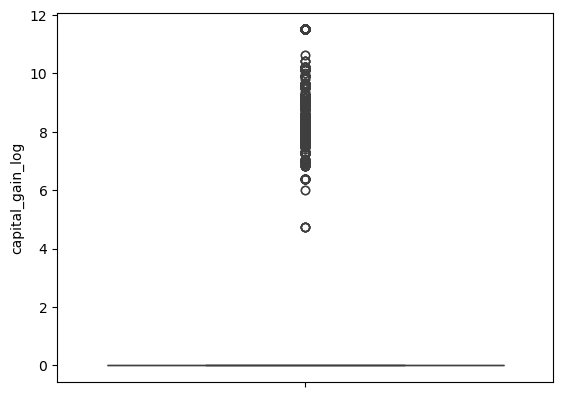

In [23]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])
sns.boxplot(y=df['capital_gain_log'])
plt.show()


# Conclusion:

capital-gain & capital-loss :

Huge number of outliers, but they are real values so we cant remove them. We can use log transform instead.

hours-per-week:

Few high values (80–99), these are valid so keeping them

age: Mostly clean and no action needed